# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'DataSet/train.p'
testing_file = 'DataSet/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_train)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 39209
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

26
30363


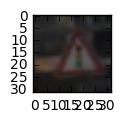

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

rand_image_index = np.random.randint(0, len(X_train))
plt.figure(figsize=(1,1))
plt.imshow(X_train[rand_image_index].squeeze())
print(y_train[rand_image_index])
print(rand_image_index)

(32, 32, 3)
24


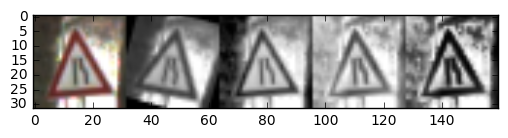

In [4]:
import cv2

def RotateImages(image_set):
    images = []
    for item in image_set:
        angle = 0
        
        while angle != 0:
            angle = np.random.randint(-15, 15)
            
        img = item[:]
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        dst = cv2.warpAffine(img,M,(32,32))
        dst =  cv2.resize(img[3:29,3:29,:], (32, 32))
        images.append(dst)
        
    return np.array(images)

def DistortImages(image_set):
    images = []
    for item in image_set:
        shift = 0
        
        while shift != 0:
            shift = np.random.randint(-2, 2)
        
        img = item[:]
        shift_not = shift *-1
        pts1 = np.float32([[16,16],[28,16],[16,28]])
        pts2 = np.float32([[16,16],[28+shift,16+shift_not],[16+shift,28+shift_not]])
        M = cv2.getAffineTransform(pts1,pts2)
        dst = cv2.warpAffine(img,M,(32,32))
        dst =  cv2.resize(dst[2:30,2:30,:], (32, 32))
        images.append(dst)
        
    return np.array(images)

#15407
#15905
rand_image_index = np.random.randint(0, len(X_train))
img = X_train[rand_image_index]
label_img = y_train[rand_image_index]

image = img
print(np.shape(image))

img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#plt.figure(figsize=(1,1))
#plt.imshow(img, cmap='gray')
#plt.imshow(img)
print(label_img)

equ = cv2.equalizeHist(img)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
cl1 = clahe.apply(img)
cl2 = cv2.equalizeHist(cl1)

#res = np.hstack((img,equ,cl1))

equ = cv2.cvtColor(equ, cv2.COLOR_GRAY2RGB)
cl1 = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
cl2 = cv2.cvtColor(cl2, cv2.COLOR_GRAY2RGB)

rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),-15,1)
dst = cv2.warpAffine(img,M,(cols,rows))

dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)

res = np.hstack((image,dst,equ,cl1,cl2))

plt.imshow(res, cmap='gray')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

### Data preprocessing

I decided to preprocess the data using some kind of histogram normalization, because it seemed to reduce the difference between night and day images, the one that i used is called Contrast Limited Adaptive Histogram Equalization (CLAHE), which seems too make images also a bit more sharp, and durung the experiments it performed better than the unprocessed image.

In [5]:
import copy

def CLAHEImages(image_set):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    
    gray_imgs = [cv2.cvtColor(item, cv2.COLOR_RGB2YCR_CB) for item in image_set]
    clahe_imgs = []
    for gray_item in gray_imgs:
        gray_item[:,:,0] = clahe.apply(gray_item[:,:,0])
        clahe_imgs.append(gray_item)
    return np.array([cv2.cvtColor(clahe_item, cv2.COLOR_YCR_CB2RGB) for clahe_item in clahe_imgs])

X_train_copy = CLAHEImages(copy.deepcopy(X_train))
X_test_copy = CLAHEImages(copy.deepcopy(X_test))

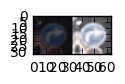

In [6]:
rand_image_index = np.random.randint(0, len(X_train))
res = np.hstack((X_train[rand_image_index],X_train_copy[rand_image_index]))
plt.figure(figsize=(1,1))
plt.imshow(res)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

### Validation set

I decided to separate a validation set, composed of 20% of the train set, without any fake generated data, because I wanted to keep the validation set as close as possible to the test data set, without any fake data.

I used sklearn.model_selection to split the data set randomly, so I would make more probable that an even distribution of the classes between both sets would be assured.

In [7]:
### Create validation set
import numpy as np
from sklearn.model_selection import train_test_split

X_train_copy, X_validation, y_train, y_validation = train_test_split(X_train_copy, y_train, test_size=0.2, random_state=42)

### Additional data

Additional data was created, because as susgested in the papper it would increase the performance which indeed happened, as the tests sugested.

I did two type of tranformation which added each another fold of images to the original dataset

On the first tranformation the images were rotated ramdomly from -15 to 15 degres avoiding 0, and cropped and resized the image to remove the black patches that appered.

On the second tranformation the images had the lines perspective shifted ramdomly from -2 to 2 degres avoiding 0, and cropped and resized the image to remove the black patches that appered.

I ended up with a training set 3 times the size of the original one


In [8]:
### Generate fake data

rotate = copy.deepcopy(X_train_copy)
change_angle = copy.deepcopy(X_train_copy)

rotate = RotateImages(rotate)
change_angle = DistortImages(change_angle)

X_train_copy = np.concatenate((X_train_copy, rotate), axis=0)
X_train_copy = np.concatenate((X_train_copy, change_angle), axis=0)

y_rotate = copy.deepcopy(y_train)
y_train = np.concatenate((y_train, y_rotate), axis=0)
y_train = np.concatenate((y_train, y_rotate), axis=0)

### Normalize data

I also normalized the traing set by seting it to zero mean and 1 standard deviation

In [9]:
### normalizing the data
def Normalize(image_set):
    image_set_mean = np.mean(image_set)
    image_set = image_set - image_set_mean
    image_set_std = np.std(image_set)
    image_set = image_set / image_set_std
    return image_set
    
X_train_copy = Normalize(X_train_copy)
X_validation = Normalize(X_validation)
X_test_copy = Normalize(X_test_copy)

print("Mean almost zero ", np.mean(X_train_copy))
print("Std 1, ", np.std(X_train_copy))

Mean almost zero  -1.04001189807e-16
Std 1,  1.0


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Architecture

The relu activations were replaced by tanh activation, and other changes were made to make it deeper and have more features.

Dropout was added to the fully conected layer to avoid overfitting.

And the first layer was maxpooled a second time then flattened and concatenated with the flat second layer and the resulting array was feed to the fully conected layers.


![title](model.png)

    Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.

    Activation.

    Pooling. Input = 28x28x32. Output = 14x14x32.

        Layer 1 Redux Pooling. Input = 14x14x32. Output = 7x7x32.

    Layer 2: Convolutional. Output = 10x10x64.

    Activation.

    Pooling. Input = 10x10x64. Output = 5x5x64.

    Flatten Layer 1 Redux. Input = 7x7x32. Output = 1568.

    Flatten Layer 2. Input = 5x5x64. Output = 1600.

        Concat. Inputs = 1568, 1600. Output = 3168

        Dropout

        Layer 3: Fully Connected. Input = 3168. Output = 1000.

        Activation.

        Dropout

        Layer 4: Fully Connected. Input = 1000. Output = 500.

        Activation.

        Dropout

        Layer 5: Fully Connected. Input = 500. Output = 43.

In [10]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.tanh(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 1 Redux Pooling. Input = 14x14x32. Output = 7x7x32.
    conv1_redux = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.tanh(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 7x7x32. Output = 1568.
    f_conv1 = flatten(conv1_redux)
    
    # Flatten. Input = 5x5x64. Output = 1600.
    f_conv2 = flatten(conv2)
    
    # Concat. Inputs = 1568, 1600. Output = 3168
    fc0 = tf.concat(1, (f_conv1, f_conv2))
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 3168. Output = 1000.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3168, 1000), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1000))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.tanh(fc1)

    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 1000. Output = 500.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1000, 500), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(500))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.tanh(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 500. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(500, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Training

Training was performed used the AdamOptimizer, the batch size was kept on 128, and the epochs were increazed to 30.

Model was trained on the enhanced with fake data dataset, and evaluated on the validation set.

The training data was shuffled for each epoch

And keep_prob of 0.5 was used during learning and 1 during evaluation

In [13]:
### Train pipeline
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
### Model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE, ):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
### shufle data
from sklearn.utils import shuffle
X_train_copy, y_train = shuffle(X_train_copy, y_train)

In [16]:
### Train Model
previous_accuracy = -1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_copy)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_copy, y_train = shuffle(X_train_copy, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_copy[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        if validation_accuracy > previous_accuracy:
            previous_accuracy = validation_accuracy
            saver.save(sess, 'traffic_sign_classifier')
            print("Model saved")    
        
        print()

Training...

EPOCH 1 ...
Validation Accuracy = 0.912
Model saved

EPOCH 2 ...
Validation Accuracy = 0.962
Model saved

EPOCH 3 ...
Validation Accuracy = 0.973
Model saved

EPOCH 4 ...
Validation Accuracy = 0.983
Model saved

EPOCH 5 ...
Validation Accuracy = 0.984
Model saved

EPOCH 6 ...
Validation Accuracy = 0.985
Model saved

EPOCH 7 ...
Validation Accuracy = 0.987
Model saved

EPOCH 8 ...
Validation Accuracy = 0.989
Model saved

EPOCH 9 ...
Validation Accuracy = 0.990
Model saved

EPOCH 10 ...
Validation Accuracy = 0.989

EPOCH 11 ...
Validation Accuracy = 0.989

EPOCH 12 ...
Validation Accuracy = 0.990
Model saved

EPOCH 13 ...
Validation Accuracy = 0.990

EPOCH 14 ...
Validation Accuracy = 0.993
Model saved

EPOCH 15 ...
Validation Accuracy = 0.991

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.992

EPOCH 18 ...
Validation Accuracy = 0.990

EPOCH 19 ...
Validation Accuracy = 0.990

EPOCH 20 ...
Validation Accuracy = 0.991

EPOCH 21 ...
Validation 

### Test Model

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_copy, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.963


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I began by implementing the LeNet model, without any changes apart from the dimensions of the parameters, (from GrayScale to RGB), then I tried to find some way of processing the data that would increase the performance, I impletented several diferent image processing techniques the best one was CLAHE, after I implemented normalization which incremented the performance drastically, then I tried to make the model deeper and use dropout to keep it from overfiting, which increased the performance a little more.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Comments

I think that these images are particularly difficult because they were very badly resized in pbrush, but I think it's a good test as well 

[11, 25, 14, 11, 5]


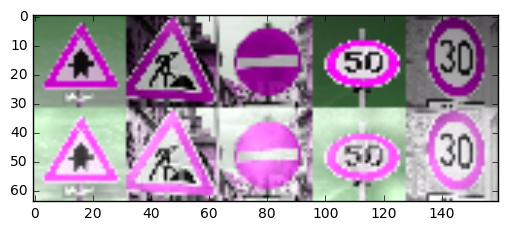

In [23]:
test_images = []
for i in range(1,6):
    img = np.array(cv2.imread('FinalTestDataSet/' + str(i) + '.png'))
    b,g,r = [img[:, :, 0], img[:, :, 1], img[:, :, 2]]
    img[:, :, 0], img[:, :, 1], img[:, :, 2] = [r, g, b]
    test_images.append(img)

test_images = np.array(test_images)
test_images_copy = CLAHEImages(test_images[:])


res1 = np.hstack((test_images))
res2 = np.hstack((test_images_copy))
res = np.concatenate((res1, res2), axis=0)
plt.imshow(res)

test_images_copy = Normalize(test_images_copy)

nn_output = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output_predictions = sess.run(nn_output, feed_dict={x: test_images_copy, keep_prob: 1})

print([np.argmax(prediction) for prediction in output_predictions])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images shown below could potentially be dificult to classify because they are distorted, or it's too dark, or lights and shadows are affecting the image. These are the types of images that even for humans are dificult to classify.

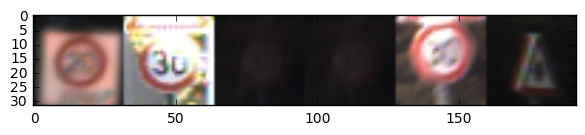

In [24]:
res = np.hstack((X_train[90],X_train[240],X_train[570],X_train[570], X_train[1714], X_train[17520]))
plt.figure(figsize=(7,7))
plt.imshow(res)


In [25]:

#if index==None:
#    index = 0
#    
#index = index+1000
#res1 = np.hstack((X_train[index+0:index+9]))
#res2 = np.hstack((X_train[index+10:index+19]))
#res3 = np.hstack((X_train[index+20:index+29]))#

#res = np.concatenate((res1, res2, res3), axis=0)
#plt.figure(figsize=(7,7))
#plt.imshow(res)
#print(index)


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

[11 25 14 11  5]
2 out of five,  40.0 %


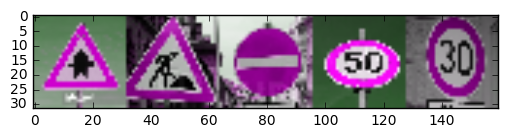

In [26]:
test_images = []
for i in range(1,6):
    img = np.array(cv2.imread('FinalTestDataSet/' + str(i) + '.png'))
    b,g,r = [img[:, :, 0], img[:, :, 1], img[:, :, 2]]
    img[:, :, 0], img[:, :, 1], img[:, :, 2] = [r, g, b]
    test_images.append(img)

test_images = np.array(test_images)
test_images_copy = CLAHEImages(test_images[:])


res = np.hstack((test_images))
plt.imshow(res)

test_images_copy = Normalize(test_images_copy)

nn_softmax = tf.nn.softmax(logits)
nn_output = tf.argmax(nn_softmax, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output_predictions = sess.run(nn_output, feed_dict={x: test_images_copy, keep_prob: 1})

print(output_predictions)

print("2 out of five, ", (2*100)/5, "%")

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Aparently the miss ones were close, and a second guess would do the job, but systems seems to be pretty unsure, which I think can be blamed on the quality of the images

In [27]:
### Visualize the softmax probabilities here.

top_probs = tf.nn.top_k(nn_softmax, 3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output_top_predictions = sess.run(top_probs, feed_dict={x: test_images_copy, keep_prob: 1})
    
print(output_top_predictions)

TopKV2(values=array([[  9.98974323e-01,   9.51103400e-04,   7.34759233e-05],
       [  9.99980450e-01,   1.52519424e-05,   2.22910171e-06],
       [  5.69199085e-01,   4.04750466e-01,   2.59079691e-02],
       [  7.10284472e-01,   1.70388952e-01,   3.77282836e-02],
       [  6.33414865e-01,   3.50274593e-01,   1.13939010e-02]], dtype=float32), indices=array([[11, 27, 18],
       [25, 22, 10],
       [14, 17, 15],
       [11,  2, 23],
       [ 5,  3,  2]], dtype=int32))


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.